# Excess Micromotion Calculations

[6.26281800e-03 7.48526037e+00]
199.47114020071638


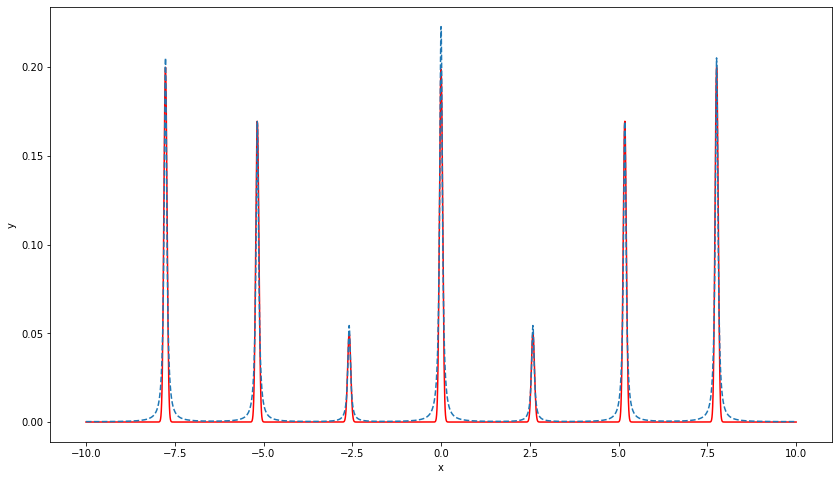

3.4984985416150496e-05
DC Field N/C 76.16164524233997
Voltage 0.22848493572701992


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.special as sp
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

W=2.587##MHz
g = 2e-3

def func(x, a, b):
    temp=0
    for n in range(-200,200,1):
        temp += (sp.jv(n,b)**2)/((x+n*W)**2+(.5*g)*2)
    return a*temp

def makeData(x,c,msb):
    dat = np.zeros(len(x))
    dat += msb[0]*c * np.exp( - (x)**2 / (2 * g) )
    for i in range(1,len(msb)):
        dat += msb[i]*c* np.exp( - (x - i*W)**2 / (2 * g) )
        dat += msb[i]*c* np.exp( - (x - i*-W)**2 / (2 * g) )
    return dat

xdata = np.linspace(-10, 10, 2000)

sbs = [.2,.05,.17,.2,0]
ydata = makeData(xdata,1,sbs)
popt, pcov = curve_fit(func, xdata, ydata,p0=[0,6])
print(popt)
print( 1/(g * np.sqrt(2 * np.pi)))
# plt.plot(xdata, func(xdata,1/16,0))
plt.plot(xdata, ydata, 'r')
plt.plot(xdata, func(xdata, *popt),'--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

q=.12
k=2*np.pi/(1762e-9)
beta=popt[1]
u0=2*beta/(k*q)

print(u0)
e=1.602e-19
m=2.2085e-25
w=200e3*2*np.pi
Edc=u0*m*w**2/e
print('DC Field N/C', Edc)
print('Voltage', Edc*3e-3)

# 